### Store a real world data set from the internet in a database (Db2 on IBM Cloud), gain insights into data using SQL queries, visualize a portion of the data in the database to see what story it tells.

#### Installing ipython-sql first

In [93]:
pip install --user --upgrade ipython-sql

Requirement already up-to-date: ipython-sql in c:\users\naserya\appdata\roaming\python\python37\site-packages (0.4.0)
Note: you may need to restart the kernel to use updated packages.


#### Then installing ibm_db & ibm_db_sa

In [94]:
pip install --user ibm_db

Note: you may need to restart the kernel to use updated packages.


In [95]:
pip install --user ibm_db_sa

Note: you may need to restart the kernel to use updated packages.


#### loading the sql extension

In [96]:
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


#### Defining the connection string for my Db2 on Cloud database instance below

In [97]:
%sql ibm_db_sa://XXXXXXXXXXXXXXXXXXXXXX@dashdb-txn-sbox-yp-lon02-06.services.eu-gb.bluemix.net:50000/BLUDB

## Storing the dataset in a table

##### The PERSIST command in SQL "magic" simplifies the process of table creation and writing the data from a pandas dataframe into the table

In [98]:
import pandas
chicago_socioeconomic_data = pandas.read_csv('https://data.cityofchicago.org/resource/jcxq-k9xf.csv')

In [99]:
%sql PERSIST chicago_socioeconomic_data

 * ibm_db_sa://tdt19382:***@dashdb-txn-sbox-yp-lon02-06.services.eu-gb.bluemix.net:50000/BLUDB
(ibm_db_dbi.ProgrammingError) ibm_db_dbi::ProgrammingError: Exception('Statement Execute Failed: [IBM][CLI Driver][DB2/LINUXX8664] SQL0104N  An unexpected token "END-OF-STATEMENT" was found following "o_socioeconomic_data".  Expected tokens may include:  "JOIN <joined_table>".  SQLSTATE=42601\r SQLCODE=-104')
[SQL: PERSIST chicago_socioeconomic_data]
(Background on this error at: http://sqlalche.me/e/f405)


##### Verifing that the table creation was successful by making a basic query like:

In [109]:
%sql select * from chicago_socioeconomic_data fetch first 5 rows only

 * ibm_db_sa://tdt19382:***@dashdb-txn-sbox-yp-lon02-06.services.eu-gb.bluemix.net:50000/BLUDB
Done.


index,ca,community_area_name,percent_of_housing_crowded,percent_households_below_poverty,percent_aged_16_unemployed,percent_aged_25_without_high_school_diploma,percent_aged_under_18_or_over_64,per_capita_income_,hardship_index
0,1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
1,2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
2,3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
3,4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
4,5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0


##### Find out how many community areas in Chicago have a hardship index greater than 50.0?


In [101]:
%sql select count(*) as Num_of_Row from chicago_socioeconomic_data where hardship_index >50

 * ibm_db_sa://tdt19382:***@dashdb-txn-sbox-yp-lon02-06.services.eu-gb.bluemix.net:50000/BLUDB
Done.


num_of_row
38


##### Find out which community area which has the highest hardship index?

In [102]:
%sql select community_area_name from chicago_socioeconomic_data where hardship_index in (select max(hardship_index) from chicago_socioeconomic_data)

 * ibm_db_sa://tdt19382:***@dashdb-txn-sbox-yp-lon02-06.services.eu-gb.bluemix.net:50000/BLUDB
Done.


community_area_name
Riverdale


##### Find out which Chicago community areas have per-capita incomes greater than $60,000?


In [103]:
%sql SELECT community_area_name FROM chicago_socioeconomic_data WHERE per_capita_income_ > 60000;

 * ibm_db_sa://tdt19382:***@dashdb-txn-sbox-yp-lon02-06.services.eu-gb.bluemix.net:50000/BLUDB
Done.


community_area_name
Lake View
Lincoln Park
Near North Side
Loop


##### Find out which three Chicago community areas have the highest hardship_index and store them in a new table.


In [104]:
%%sql

create table high_low_area(highest_hardship_area char(20), hardship_index int, income int);
insert into high_low_area
select community_area_name, hardship_index, per_capita_income_ from chicago_socioeconomic_data order by 2 desc nulls last limit 3

 * ibm_db_sa://tdt19382:***@dashdb-txn-sbox-yp-lon02-06.services.eu-gb.bluemix.net:50000/BLUDB
(ibm_db_dbi.ProgrammingError) ibm_db_dbi::ProgrammingError: Exception('Statement Execute Failed: [IBM][CLI Driver][DB2/LINUXX8664] SQL0601N  The name of the object to be created is identical to the existing name "TDT19382.HIGH_LOW_AREA" of type "TABLE".  SQLSTATE=42710\r SQLCODE=-601')
[SQL: create table high_low_area(highest_hardship_area char(20), hardship_index int, income int);]
(Background on this error at: http://sqlalche.me/e/f405)


In [105]:
%sql select highest_hardship_area, hardship_index,income, REPLACE(income,income, income/1000) as income_K from high_low_area fetch first 2 rows only

 * ibm_db_sa://tdt19382:***@dashdb-txn-sbox-yp-lon02-06.services.eu-gb.bluemix.net:50000/BLUDB
Done.


highest_hardship_area,hardship_index,income,income_k
Riverdale,98,8201,8
Fuller Park,97,10432,10


##### Creating a scatter plot using the variables `per_capita_income_` and `hardship_index` and Explaining the correlation between the two variables.


In [106]:
import matplotlib.pyplot as plt
%matplotlib inline


In [27]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.


In [107]:
import seaborn as sns

 * ibm_db_sa://tdt19382:***@dashdb-txn-sbox-yp-lon02-06.services.eu-gb.bluemix.net:50000/BLUDB
Done.


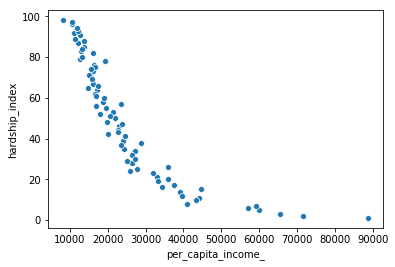

In [108]:
income_vs_hardship= %sql select per_capita_income_, hardship_index from chicago_socioeconomic_data;
plot=sns.scatterplot(x='per_capita_income_', y='hardship_index', data=income_vs_hardship.DataFrame())